1) Load the dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# libraries for deap learning - tendorflow and keras
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


2) Perform the below visualizations.

a) Univariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4186cb3f50>]],
      dtype=object)

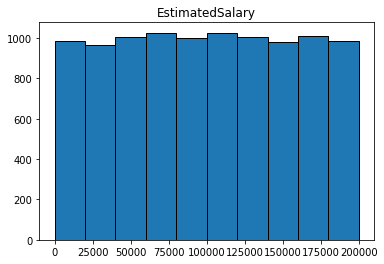

In [2]:
data.hist(column='EstimatedSalary',grid=False,edgecolor='black')

b) Bi-variate analysis

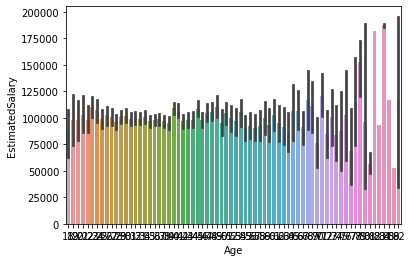

In [3]:
sns.barplot(x='Age',y='EstimatedSalary',data=data)

c) Multi-variate analysis

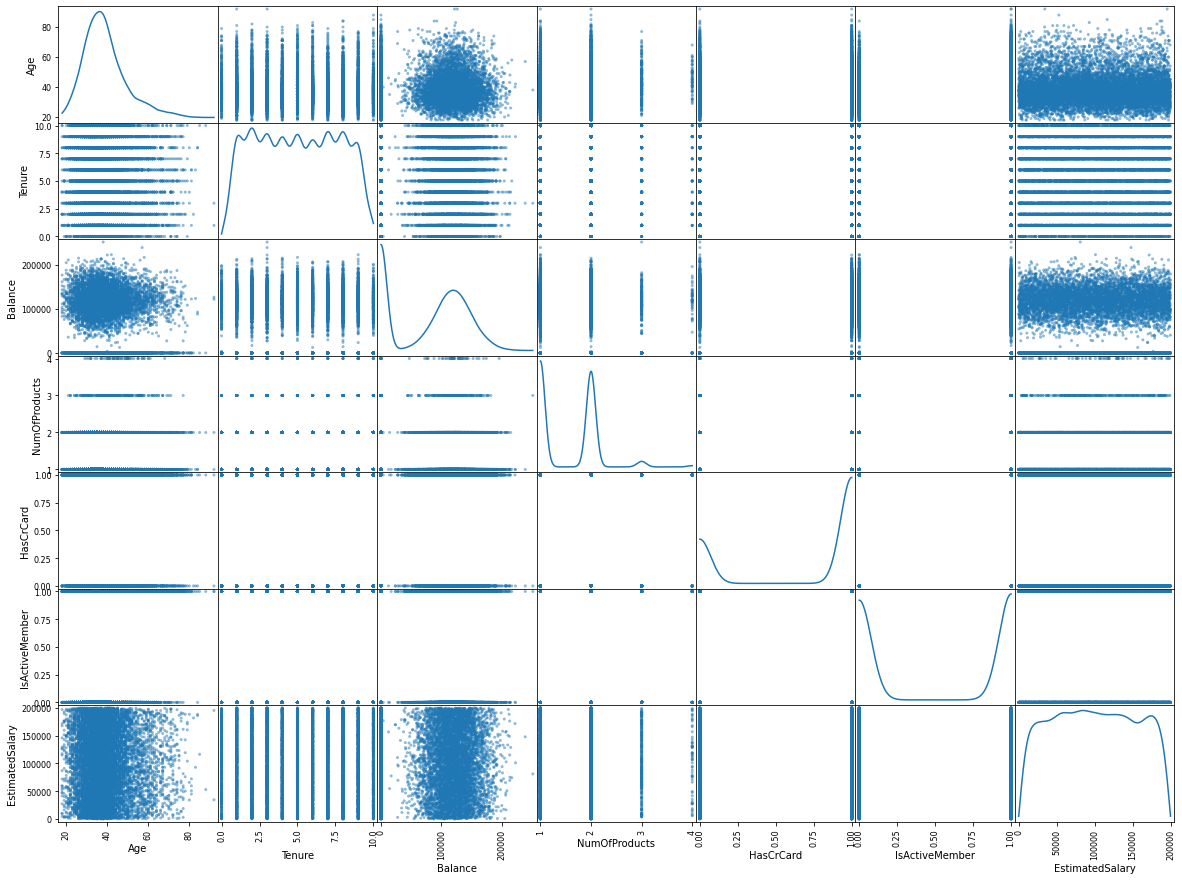

In [4]:
pd.plotting.scatter_matrix(data.loc[:,'Age':'EstimatedSalary'],diagonal='kde',figsize=(20,15))
plt.show()

3) Perform descriptive analysis on the dataset.

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


4) Handle the missing values.

In [ ]:
data.isnull().sum() #missing value check 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

5) Find the outliers and replace the outliers.

0       38.9218
1       38.9218
2       38.9218
3       39.0000
4       38.9218
         ...   
9995    39.0000
9996    35.0000
9997    36.0000
9998    38.9218
9999    28.0000
Name: Age, Length: 10000, dtype: float64

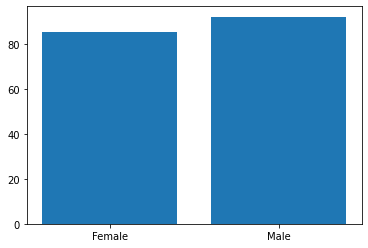

In [6]:
plt.bar(data['Gender'],data['Age'])
data1=data
mean=data1['Age'].mean()
data1['Age']=np.where(data1['Age']>40,mean,data1['Age'])
data1['Age']

6) Check for categorical column and perform encoding.

In [7]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])
le=LabelEncoder()
data['Geography']=le.fit_transform(data['Geography'])
data['Surname']=le.fit_transform(data['Surname'])
Geography=pd.get_dummies(data['Geography'],prefix='Country')
Geography
data2=data.join(Geography)
data2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_0,Country_1,Country_2
0,1,15634602,1115,619,0,1,38.9218,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,1177,608,2,1,38.9218,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,2040,502,0,1,38.9218,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,289,699,0,1,39.0000,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,1822,850,2,1,38.9218,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0000,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,1336,516,0,0,35.0000,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,1570,709,0,1,36.0000,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,2345,772,1,0,38.9218,3,75075.31,2,1,0,92888.52,1,0,1,0


7) Split the data into dependent and independent variable.

In [8]:
#Independent
x=data.iloc[:,0:6]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender
0,1,15634602,1115,619,0,1
1,2,15647311,1177,608,2,1
2,3,15619304,2040,502,0,1
3,4,15701354,289,699,0,1
4,5,15737888,1822,850,2,1
...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0
9996,9997,15569892,1336,516,0,0
9997,9998,15584532,1570,709,0,1
9998,9999,15682355,2345,772,1,0


In [9]:
#dependent
y=data.iloc[:,6:14]
y

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,38.9218,2,0.00,1,1,1,101348.88,1
1,38.9218,1,83807.86,1,0,1,112542.58,0
2,38.9218,8,159660.80,3,1,0,113931.57,1
3,39.0000,1,0.00,2,0,0,93826.63,0
4,38.9218,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,39.0000,5,0.00,2,1,0,96270.64,0
9996,35.0000,10,57369.61,1,1,1,101699.77,0
9997,36.0000,7,0.00,1,0,1,42085.58,1
9998,38.9218,3,75075.31,2,1,0,92888.52,1


8) Scale the independent variables.

In [10]:
a=scale(x)
a

array([[-1.73187761, -0.78321342, -0.46418322, -0.32622142, -0.90188624,
         1.09598752],
       [-1.7315312 , -0.60653412, -0.3909112 , -0.44003595,  1.51506738,
         1.09598752],
       [-1.73118479, -0.99588476,  0.62898807, -1.53679418, -0.90188624,
         1.09598752],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887,  0.60498839, -0.90188624,
         1.09598752],
       [ 1.7315312 , -0.11935577,  0.98943914,  1.25683526,  0.30659057,
        -0.91241915],
       [ 1.73187761, -0.87055909,  1.4692527 ,  1.46377078, -0.90188624,
         1.09598752]])

9) Split the data into training and testing.

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=11)
xtrain
ytrain
xtest
ytest

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3104,31.0000,5,145537.21,1,1,0,132404.64,0
6353,35.0000,8,114212.60,1,1,1,74322.85,0
8689,38.9218,10,129431.36,1,0,1,21343.74,0
5857,38.9218,7,0.00,1,1,0,26215.85,1
6011,38.9218,1,123086.39,1,1,1,41042.40,1
...,...,...,...,...,...,...,...,...
8125,38.0000,9,123948.85,1,1,0,76053.07,0
8444,38.9218,3,0.00,2,1,1,172240.27,0
2167,33.0000,1,126588.81,2,0,1,62163.53,0
8043,31.0000,4,141356.47,1,0,0,137985.69,0
